# Millennial Income and Debt

Aiden Thakur
my github: -> (https://github.com/AidenThakur)

## The Problem

Millenials have recently become the largest group of living adults in the United States, defined between ages 23-38 years old, with around 72 million milennials today. Milennials are also said to be the generation after World War 2 to be less wealthy than their parent generation, a lot of them coming from the great recession and increasing cost of living as well as fewer jobs and less people being willing to own homes. Lots of milennials feel that in order to purchase a house and start the American dream, one needs a four year generation so it feels like at 18 they are already behind with debt, as price of four year schools rose by 200% within the past 30 years. With the growing cost of products and services it becomes harder for people to interact with the consumer-products and services which will create a slower economy. 

These are some questions I hope to answer while exploring data:

- How does geographical location affect income?
- What statuses seem to affect income ammount?
- How much has debt grown for milennials?

To address the problem I will need to gather data that show income, location, a persons status and debt within the United States, where I will sort the data and look for any correlations that could possibly answer the questions above. This will be a more quantative methodolgy to gather numerical data that shows some correlation. 

The approach I will take to answer these questions will be to make look at data sets income through the US, find data on how marital status affects income, as well as education, sex, ethnicity and the state(as every state is different in terms of housing price, income, etc). I will also look into types of debt and see the growth over time. Using data sets that will show income through the United States to try and find any correlation between the geographical location. This will be shown through plots and table. 

I believe this exploration could prove helpful as it will good at identifying key factors that contribute to this disparity in wealth as well as some issues that millenials are currently facing, that Gen Z and future generations could (also)be facing. It is important to acknowledge and know what factors are at play that could prove to be detrimental to the overall health of our generation(s).

Sources for information brought up in problem statment

https://www.pewresearch.org/short-reads/2020/04/28/millennials-overtake-baby-boomers-as-americas-largest-generation/

https://www.investopedia.com/insights/how-financial-crisis-affected-millennials/#:~:text=The%20Great%20Recession%20has%20had,compared%20to%20other%20generational%20groups

https://www.cnn.com/2024/01/19/economy/american-dream-millennials/index.html

I gathered my data from the following sites:

https://github.com/jbrownlee/Datasets/blob/master/adult-all.csv

https://www.kaggle.com/datasets/goldenoakresearch/us-household-income-stats-geo-locations?select=kaggle_income.csv

https://data.world/finance/student-loan-debt.

Modules used and why I am using them:
- Pandas : I am using pandas for making and working with dataframes and loading incsv files. This will be the main module for cleaning data
- Seaborn: For making plots from the data frames
- Matplotlib: Also used for plotting graphs from data frames
- Regex/Re: For finding specific strings to grab or replace them. 
- Numpy: Used for mathematics or basic arthimatic, and arrays
- plotly.express: Allows me to make interactive plots 
- ipywidgets: allows me to make sliders, boxes and such with interactive graphs
- Warnings: Warnings allows me to supress certain warning messages while plotting

I got my data from the following websites: Kaggle, The United States Census Bereau, Github(not code just data), and data world.
Before all datasets I will include a the source for the data before each cell.

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np
import plotly.express as px
from ipywidgets import interact
import ipywidgets as widgets
import warnings
warnings.filterwarnings("ignore")

This adults dataset contains income as well as various features such as status in family(married, divore, single and relationship to family), ethnicity and gender. The original purpose of this data set was to be used in a predictive algorithm by University of California Irvine. Something to note about this Dataset is that it does not state that its only millennials, however since millenials make up most the work force it is safe to assume that this can be somewhat representative of millenials. We can assume that as the data was uploaded 4 years ago I can safely assume that it could be as recent as 2020, and so I will as such.

The raw dataset also contains peoples native countries which will be important to see how an immigrants compare to native US citizens.
Another note about this dataset is that any unknown values have been set to ?, so it is not null but rather informations wasnt gathered or known. We also see that the income is sorted by whether or not that person makes above or below 50 thousand a year.

This data set has 15 variables all which relate to a persons age, their status in terms of education, relationship, race and gender and their income below or above 50 thousand.

https://github.com/jbrownlee/Datasets/blob/master/adult-all.csv 

In [548]:
adults = pd.read_csv('adult-all.csv')
adults

39         State-gov   77516  Bachelors  13       Never-married  \
0      50  Self-emp-not-inc   83311  Bachelors  13  Married-civ-spouse   
1      38           Private  215646    HS-grad   9            Divorced   
2      53           Private  234721       11th   7  Married-civ-spouse   
3      28           Private  338409  Bachelors  13  Married-civ-spouse   
4      37           Private  284582    Masters  14  Married-civ-spouse   
...    ..               ...     ...        ...  ..                 ...   
48836  39           Private  215419  Bachelors  13            Divorced   
48837  64                 ?  321403    HS-grad   9             Widowed   
48838  38           Private  374983  Bachelors  13  Married-civ-spouse   
48839  44           Private   83891  Bachelors  13            Divorced   
48840  35      Self-emp-inc  182148  Bachelors  13  Married-civ-spouse   

            Adm-clerical   Not-in-family               White    Male  2174  0  \
0        Exec-managerial         Husband               White    Male     0  0   
1      Handlers-cleaners   Not-in-family               White    Male     0  0   
2      Handlers-cleaners         Husband               Black    Male     0  0   
3         Prof-specialty            Wife               Black  Female     0  0   
4        Exec-managerial            Wife               White  Female     0  0   
...                  ...             ...                 ...     ...   ... ..   
48836     Prof-specialty   Not-in-family               White  Female     0  0   
48837                  ?  Other-relative               Black    Male     0  0   
48838     Prof-specialty         Husband               White    Male     0  0   
48839       Adm-clerical       Own-child  Asian-Pac-Islander    Male  5455  0   
48840    Exec-managerial         Husband               White    Male     0  0   

       40  United-States  <=50K  
0      13  United-States  <=50K  
1      40  United-States  <=50K  
2      40  United-States  <=50K  
3      40           Cuba  <=50K  
4      40  United-States  <=50K  
...    ..            ...    ...  
48836  36  United-States  <=50K  
48837  40  United-States  <=50K  
48838  50  United-States  <=50K  
48839  40  United-States  <=50K  
48840  60  United-States   >50K  

[48841 rows x 15 columns]

In order to change the columns first I have to add the columns into the dataframe, and I do this by locating the last row and adding one row below it and settings its value to that row. Afterwards I set the proper column names. 

In [549]:
#adding the columns as a row at the bottom of the table
adults.loc[48842] =  adults.columns
adults.loc[48842] == adults.columns  #To check if the row has been set to column names

39               True
State-gov        True
77516            True
Bachelors        True
13               True
Never-married    True
Adm-clerical     True
Not-in-family    True
White            True
Male             True
2174             True
0                True
40               True
United-States    True
<=50K            True
dtype: bool

Majority of these columns are a part of the focus group, the ones we dont need are fnlwgt, capital gain/loss and native-country(as we already will be focusing on the US). 

In [550]:
# renaming the columns
adults.columns = ['age', 'workclass', 'fnlwgt', 'education', 'educational_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income']
adults.head()

age         workclass  fnlwgt  education educational_num  \
0  50  Self-emp-not-inc   83311  Bachelors              13   
1  38           Private  215646    HS-grad               9   
2  53           Private  234721       11th               7   
3  28           Private  338409  Bachelors              13   
4  37           Private  284582    Masters              14   

       marital_status         occupation   relationship   race  gender  \
0  Married-civ-spouse    Exec-managerial        Husband  White    Male   
1            Divorced  Handlers-cleaners  Not-in-family  White    Male   
2  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
3  Married-civ-spouse     Prof-specialty           Wife  Black  Female   
4  Married-civ-spouse    Exec-managerial           Wife  White  Female   

  capital_gain capital_loss hours_per_week native_country income  
0            0            0             13  United-States  <=50K  
1            0            0             40  United-States  <=50K  
2            0            0             40  United-States  <=50K  
3            0            0             40           Cuba  <=50K  
4            0            0             40  United-States  <=50K

Now that the columns have been sorted, its time to drop all the columns that are unnecessary as well as check for any null/unkown values and duplicated rows. 

Using the .info,  we see that all the data types for the columns are objects even for some values that should be of type integers, those being age, educational number and hours per week. We also see there are no null values within the data set and when checking for unkown values we see there 2530 and 2540 in columns workclass and occupation(respectively) as well as 857 people with unkown native-country. Finally when looking for duplicated values we see there are 40 in total, so those will have to be removed. 

In [551]:
adults_us_clean = adults.drop(columns = ['fnlwgt','capital_gain','capital_loss'])

In [553]:
# I want to see the information of each column 
adults_us_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48842 entries, 0 to 48842
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  object
 1   workclass        48842 non-null  object
 2   education        48842 non-null  object
 3   educational_num  48842 non-null  object
 4   marital_status   48842 non-null  object
 5   occupation       48842 non-null  object
 6   relationship     48842 non-null  object
 7   race             48842 non-null  object
 8   gender           48842 non-null  object
 9   hours_per_week   48842 non-null  object
 10  native_country   48842 non-null  object
 11  income           48842 non-null  object
dtypes: object(12)
memory usage: 5.9+ MB


In [554]:
#checking for null values
adults_us_clean.isna().sum()

age                0
workclass          0
education          0
educational_num    0
marital_status     0
occupation         0
relationship       0
race               0
gender             0
hours_per_week     0
native_country     0
income             0
dtype: int64

In [555]:
#checking unkowns
(adults_us_clean == '?').sum()

age                   0
workclass          2799
education             0
educational_num       0
marital_status        0
occupation         2809
relationship          0
race                  0
gender                0
hours_per_week        0
native_country      857
income                0
dtype: int64

In [556]:
adults_us.duplicated().sum()

40

The first order of business will be to change the data types from object to integer for columns age, educational_num. 

In [557]:
# Changing the datatype with use of astype
adults_us_clean[['age','educational_num','hours_per_week']] = adults_us_clean[['age','educational_num','hours_per_week']].astype(int)

In [558]:
adults_us_clean.dtypes

age                 int32
workclass          object
education          object
educational_num     int32
marital_status     object
occupation         object
relationship       object
race               object
gender             object
hours_per_week      int32
native_country     object
income             object
dtype: object

Now dropping all duplicated rows:

In [562]:
adults_us_clean = adults_us_clean.drop_duplicates()

For the sake of organization the final step will be to sort the table by ascending order for number of years in school they had and hours they work per week, this will make the table look nice and if we were to just look at the data from the table it would also be more informational.

In [563]:
cleaned_adult = adults_us_clean.sort_values(by = ['educational_num', 'hours_per_week'], ascending = True)

This final clean dataset shows us the the person whos data was taken their information and if their income is above or below fifty thousand. 

In [564]:
#Final cleaned adults dataset
cleaned_adult.head()

age workclass  education  educational_num marital_status  \
2883    71   Private  Preschool                1        Widowed   
13247   68   Private  Preschool                1  Never-married   
22166   39   Private  Preschool                1  Never-married   
25112   23   Private  Preschool                1  Never-married   
43337   53   Private  Preschool                1  Never-married   

              occupation   relationship   race  gender  hours_per_week  \
2883        Craft-repair      Unmarried  Black    Male              10   
13247  Machine-op-inspct  Not-in-family  White    Male              10   
22166      Other-service  Not-in-family  White  Female              12   
25112      Other-service      Own-child  White  Female              15   
43337      Other-service  Not-in-family  White  Female              15   

      native_country income  
2883   United-States  <=50K  
13247  United-States  <=50K  
22166  United-States  <=50K  
25112  United-States  <=50K  
43337    El-Salvador  <=50K

This data's original purpose was for business investment research across the US to determine the best quality and socioeconomic features of an area by the income as it is vital to know when making any ivestments in a given location. It was uploaded(and I assume the data to be gathered in) 2016/17, or possible it is data from 2011 to 2015, it is not super clear in the absract. This data is not the complete set the contains 32,000 records opposed to full 348,893(behind a fee). 

As with the previous dataset, it is not explicitly stated that only millennials are included. Still, as millennials make up the majority of the workforce as well as majority of people alive, it would be safe to assume that it can be somewhat representative of milennials when the data was gathered. So it will be useful when looking at geographic locations and their income to see what are some places average and median income. 

This dataset contains quite a few quirks, like mean, median and standard deviations being 0, or counties being mapped to wrong Llatitude and longitude, some Cities/Places being marked as track or municiplality, it is also never explained what sum_w is. These errors cause some informational errors when plotting and will be explained more later on. 

Some features when loading the data set  that seem to of importance are the state, mean and median, and latitude and longitude.

(https://www.kaggle.com/datasets/goldenoakresearch/us-household-income-stats-geo-locations?select=kaggle_income.csv)


In [547]:
# Some peculiarities of the Data Set is that some of the values for mean, median, stDev are 0.
#Also file needed incoding to get rid of the error message
med_inc = pd.read_csv('kaggle_income.csv',encoding = "ISO-8859-1")
med_inc

id  State_Code   State_Name State_ab              County  \
0      1011000           1      Alabama       AL       Mobile County   
1      1011010           1      Alabama       AL      Barbour County   
2      1011020           1      Alabama       AL       Shelby County   
3      1011030           1      Alabama       AL       Mobile County   
4      1011040           1      Alabama       AL       Mobile County   
...        ...         ...          ...      ...                 ...   
32521   720296          72  Puerto Rico       PR  Adjuntas Municipio   
32522  7202966          72  Puerto Rico       PR  Adjuntas Municipio   
32523  7202976          72  Puerto Rico       PR  Adjuntas Municipio   
32524  7202986          72  Puerto Rico       PR  Adjuntas Municipio   
32525  7202996          72  Puerto Rico       PR  Adjuntas Municipio   

                 City            Place   Type Primary  Zip_Code Area_Code  \
0           Chickasaw   Chickasaw city   City   place     36611       251   
1          Louisville        Clio city   City   place     36048       334   
2          Columbiana  Columbiana city   City   place     35051       205   
3             Satsuma      Creola city   City   place     36572       251   
4      Dauphin Island   Dauphin Island   Town   place     36528       251   
...               ...              ...    ...     ...       ...       ...   
32521        Guaynabo         Adjuntas  Track   Track       970       787   
32522          Aguada         Adjuntas  Track   Track       602       787   
32523          Aguada         Adjuntas  Track   Track       602       787   
32524          Aguada         Adjuntas  Track   Track       602       787   
32525       Aguadilla         Adjuntas  Track   Track       603       787   

          ALand     AWater        Lat        Lon   Mean  Median  Stdev  \
0      10894952     909156  30.771450 -88.079697  38773   30506  33101   
1      26070325      23254  31.708516 -85.611039  37725   19528  43789   
2      44835274     261034  33.191452 -86.615618  54606   31930  57348   
3      36878729    2374530  30.874343 -88.009442  63919   52814  47707   
4      16204185  413605152  30.250913 -88.171268  77948   67225  54270   
...         ...        ...        ...        ...    ...     ...    ...   
32521    589417       1691  18.397925 -66.130633  30649   13729  37977   
32522   1801613     795887  18.385424 -67.203310  15520    9923  15541   
32523  11031227          0  18.356565 -67.180686  41933   34054  31539   
32524         0   33597561  18.412041 -67.213413      0       0      0   
32525   6476604    2717115  18.478094 -67.160453  28049   20229  33333   

             sum_w  
0      1638.260513  
1       258.017685  
2       926.031000  
3       378.114619  
4       282.320328  
...            ...  
32521  1321.278082  
32522   238.813450  
32523   313.551070  
32524     0.000000  
32525   512.884803  

[32526 rows x 19 columns]

First order is to get rid of the columns that will not be looked at, those being state zip and area code, area of land and water, city, and sum_w.

In [122]:
med_inc_filt = med_inc.drop(columns = ['id','State_Code', 'Zip_Code','Area_Code','ALand','AWater','City','Place', 'sum_w'])

In [123]:
med_inc_filt.head()

State_Name State_ab          County  Type Primary        Lat        Lon  \
0    Alabama       AL   Mobile County  City   place  30.771450 -88.079697   
1    Alabama       AL  Barbour County  City   place  31.708516 -85.611039   
2    Alabama       AL   Shelby County  City   place  33.191452 -86.615618   
3    Alabama       AL   Mobile County  City   place  30.874343 -88.009442   
4    Alabama       AL   Mobile County  Town   place  30.250913 -88.171268   

    Mean  Median  Stdev  
0  38773   30506  33101  
1  37725   19528  43789  
2  54606   31930  57348  
3  63919   52814  47707  
4  77948   67225  54270

Next I want to make sure there is no non-us data within the data set, as we dont any territories or other countries. When checking the data we see Puerto Rico and this is unnecessary for this project.

In [124]:
#See what values are in the State Name column
#We will see that the only non-US
med_inc_filt['State_Name'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico'],
      dtype=object)

In [125]:
#Taking all states that are not Puerto Rico
#We also see that in the D.C is in the values, although its not a state people do live there so its fine
med_inc_us = med_inc_filt[med_inc.State_Name != 'Puerto Rico']
med_inc_us['State_Name'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

For stylization all the columns will be set to all lowercase

In [126]:
med_inc_us.columns = med_inc_us.columns.str.lower()
med_inc_us.columns

Index(['state_name', 'state_ab', 'county', 'type', 'primary', 'lat', 'lon',
       'mean', 'median', 'stdev'],
      dtype='object')

Next we want to check the data types, any null values and duplicated rows, which when check show that all the data types are proper data types(all int values are ints, all objects, objects and floats, floats). We also see no null values within the data and non duplicated rows.

In [127]:
med_inc_us.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32146 entries, 0 to 32145
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   state_name  32146 non-null  object 
 1   state_ab    32146 non-null  object 
 2   county      32146 non-null  object 
 3   type        32146 non-null  object 
 4   primary     32146 non-null  object 
 5   lat         32146 non-null  float64
 6   lon         32146 non-null  float64
 7   mean        32146 non-null  int64  
 8   median      32146 non-null  int64  
 9   stdev       32146 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.7+ MB


In [128]:
med_inc_us.isna().sum()

state_name    0
state_ab      0
county        0
type          0
primary       0
lat           0
lon           0
mean          0
median        0
stdev         0
dtype: int64

In [129]:
med_inc_us.duplicated().sum()

59

The final cleaned Med Income data set shows us a State, its abreviation of state, the county within state and its latitude and longitude as well as that states mean, median and standard deviation.

In [130]:
med_inc_us.head()

state_name state_ab          county  type primary        lat        lon  \
0    Alabama       AL   Mobile County  City   place  30.771450 -88.079697   
1    Alabama       AL  Barbour County  City   place  31.708516 -85.611039   
2    Alabama       AL   Shelby County  City   place  33.191452 -86.615618   
3    Alabama       AL   Mobile County  City   place  30.874343 -88.009442   
4    Alabama       AL   Mobile County  Town   place  30.250913 -88.171268   

    mean  median  stdev  
0  38773   30506  33101  
1  37725   19528  43789  
2  54606   31930  57348  
3  63919   52814  47707  
4  77948   67225  54270

The next three data sets come from the same site, their purpose was to be used by for research for analyzing distribution of student debt and how they factor with various types of debt and homeowner ship. The data from these sets are range from 2003 to 2014.   
All these data sets are fairly small so no need to check for nulls and duplicates.

https://data.world/finance/student-loan-debt. -> https://libertystreeteconomics.newyorkfed.org/2015/02/the_student_loan-landscape/#.V9DGeJgrLZb(original source for the data)

In [510]:
student_loan = pd.read_csv('balance_by_age.csv')
home_ownership = pd.read_csv('home_secured_debt_age30.csv')
non_mort = pd.read_csv('non_mort_balance.csv')

The data set below shows the distribution of age groups and the total student debt per year in **BILLIONS** of dollars. Milennials back in 2014 were around 33 years old so I want to group the ages for over and under 40 years(as over 40 would imply Gen X and under milennials with some gen x). They will also be grouped with over and under 30 for possible mergding with another data set. Also updating under30 to under_30 for synchronization with column names

In [511]:
student_loan

Year  under30  30_39  40_49  50_59   60+  unknown
0   2004    146.0  114.0   49.2   30.9   6.1     0.90
1   2005    161.0  129.0   55.6   38.3   8.2     0.70
2   2006    194.0  154.0   69.4   47.9  13.2     0.30
3   2007    217.0  171.0   81.7   55.4  15.8     0.40
4   2008    248.0  202.0   95.7   67.1  20.0     0.50
5   2009    273.0  229.0  109.0   77.7  25.0     0.70
6   2010    299.0  257.0  127.0   90.5  29.1     0.90
7   2011    312.0  281.0  140.0   97.2  35.2     0.90
8   2012    320.0  320.0  163.0  113.0  42.6     1.30
9   2013    356.0  354.0  184.0  126.0  49.4     1.60
10  2014    369.0  383.0  208.0  136.0  58.0     1.83

In [512]:
#Keeping it one data frame to keep from having to many.
#student_loan['over_30'] =  student_loan['30_39'] + student_loan['40_49'] + student_loan['50_59'] + student_loan['60+'] + student_loan['unknown']
student_loan['under_40'] =  student_loan['under30'] + student_loan['30_39']
student_loan['over_40'] = student_loan['40_49'] + student_loan['50_59'] + student_loan['60+'] + student_loan['unknown']
student_loan_added = student_loan.drop(columns = ['30_39','40_49','50_59','60+','unknown'])

In [513]:
student_loan_added = student_loan_added.rename(columns = {'under30':'under_30'})
student_loan_added.columns = student_loan_added.columns.str.lower()

In [514]:
student_loan_added.head()

year  under_30  under_40  over_40
0  2004     146.0     260.0     87.1
1  2005     161.0     290.0    102.8
2  2006     194.0     348.0    130.8
3  2007     217.0     388.0    153.3
4  2008     248.0     450.0    183.3

Finally checking the datatypes to make sure their all proper, which we see that they are.

In [515]:
student_loan_added.dtypes

year          int64
under_30    float64
under_40    float64
over_40     float64
dtype: object

The final clean student_loan_added shows us the year and the amount of debt in billions per age group. 

In [516]:
student_loan_added

year  under_30  under_40  over_40
0   2004     146.0     260.0    87.10
1   2005     161.0     290.0   102.80
2   2006     194.0     348.0   130.80
3   2007     217.0     388.0   153.30
4   2008     248.0     450.0   183.30
5   2009     273.0     502.0   212.40
6   2010     299.0     556.0   247.50
7   2011     312.0     593.0   273.30
8   2012     320.0     640.0   319.90
9   2013     356.0     710.0   361.00
10  2014     369.0     752.0   403.83

The home ownership data set shows the percentage of people who have students loans and house and people without a loan and their home owner ship rate for people between twenty seven and thirty from the years of 2003 to 2004. 

This data set is already pretty clean all that needs to be dont is look for years after 2003 so they are the same as well as check te data types.

In [517]:
home_ownership

Year  HaveLoan27_30  NoLoan27_30  Recession
0   2003          30.97        29.14          0
1   2004          32.60        30.57          0
2   2005          32.35        29.61          0
3   2006          33.28        29.62          0
4   2007          32.54        29.85          0
5   2008          33.43        29.60         36
6   2009          29.85        27.54         36
7   2010          27.54        26.49          0
8   2011          25.49        25.01          0
9   2012          22.85        24.07          0
10  2013          21.63        22.33          0
11  2014          20.90        21.72          0

In [518]:
# Grabbing all but 2003
hoaft_2003 = home_ownership.loc[home_ownership['Year'] >= 2004]
hoaft_2003.head()

Year  HaveLoan27_30  NoLoan27_30  Recession
1  2004          32.60        30.57          0
2  2005          32.35        29.61          0
3  2006          33.28        29.62          0
4  2007          32.54        29.85          0
5  2008          33.43        29.60         36

Changing all the column names to lowercase for styling.

In [519]:
hoaft_2003.columns = hoaft_2003.columns.str.lower()

The data types seem to all be in order.

In [520]:
hoaft_2003.dtypes

year               int64
haveloan27_30    float64
noloan27_30      float64
recession          int64
dtype: object

The final home ownership after 2003 shows homeowner ship rates with and without a student loan. 
Something intresting I see here is that there was a recession in 2008 and 09. During that time period there was the great recession where over two trillion dollars were lost.

In [521]:
hoaft_2003

year  haveloan27_30  noloan27_30  recession
1   2004          32.60        30.57          0
2   2005          32.35        29.61          0
3   2006          33.28        29.62          0
4   2007          32.54        29.85          0
5   2008          33.43        29.60         36
6   2009          29.85        27.54         36
7   2010          27.54        26.49          0
8   2011          25.49        25.01          0
9   2012          22.85        24.07          0
10  2013          21.63        22.33          0
11  2014          20.90        21.72          0

This final data set non_mort shows the amount of debt in billions of dollars for all loans besides mortgages from years 2004 to 2014 by quarter year. 
Something to note is that HELOC is Home Equity Line of Credit, it works much like a credit card in the sense that is borrowed money equal to equity of the home with the home as collateral. As one repays the the loan the credit is replenished allowing one to borrow when the need it depending on the limit established. 

Also the Time is in year-month-day format to keep consistent I will grab only the years and group them together for a total sum each year for each type of credit. 

In [522]:
#Since our other graphs are only sorted by year it makes sense to group the quarters into one based on year
non_mort

HELOC  Auto Loan  Credit Card  Student Loan  Other        Time
0     328        720          695           260    447  2004-03-31
1     367        743          697           263    423  2004-06-30
2     426        751          706           330    410  2004-09-30
3     468        728          717           346    423  2004-12-31
4     502        725          710           364    394  2005-03-31
5     528        774          717           374    402  2005-06-30
6     541        830          732           378    405  2005-09-30
7     565        792          736           392    416  2005-12-31
8     582        788          723           435    418  2006-03-31
9     590        796          739           439    423  2006-06-30
10    603        821          754           447    442  2006-09-30
11    604        821          767           482    406  2006-12-31
12    605        794          764           506    404  2007-03-31
13    619        807          796           514    408  2007-06-30
14    631        818          817           529    413  2007-09-30
15    647        815          839           548    422  2007-12-31
16    663        808          837           579    415  2008-03-31
17    679        810          850           586    401  2008-06-30
18    692        809          858           611    412  2008-09-30
19    705        791          866           639    412  2008-12-31
20    714        766          843           663    409  2009-03-31
21    713        743          824           675    389  2009-06-30
22    708        739          812           695    382  2009-09-30
23    706        722          795           721    379  2009-12-31
24    695        705          762           758    363  2010-03-31
25    683        702          744           762    349  2010-06-30
26    673        710          731           778    343  2010-09-30
27    668        711          730           812    341  2010-12-31
28    641        706          696           839    329  2011-03-31
29    625        713          694           851    330  2011-06-30
30    639        730          693           870    327  2011-09-30
31    627        734          704           874    330  2011-12-31
32    612        737          679           904    319  2012-03-31
33    589        750          672           914    312  2012-06-30
34    573        768          674           956    311  2012-09-30
35    563        783          679           967    317  2012-12-31
36    552        794          660           986    307  2013-03-31
37    540        814          668           994    296  2013-06-30
38    535        845          672          1027    304  2013-09-30
39    529        863          683          1080    317  2013-12-31
40    526        875          659          1111    314  2014-03-31
41    521        905          669          1118    323  2014-06-30
42    512        934          680          1126    327  2014-09-30
43    510        955          700          1157    335  2014-12-31

Looking at the datatypes we see that all features are their proper data types. 

In [523]:
non_mort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   HELOC         44 non-null     int64 
 1   Auto Loan     44 non-null     int64 
 2   Credit Card   44 non-null     int64 
 3   Student Loan  44 non-null     int64 
 4   Other         44 non-null     int64 
 5   Time          44 non-null     object
dtypes: int64(5), object(1)
memory usage: 2.2+ KB


After grabbing time, there will be an error when selecting just the year where it is not assigned a data type. Using coerce allow it to pushed into becomeing datetime64. However when we go an grab just the year it will turn into type of int32.

In [524]:
#Because the Date time was set to object when I would try to select just the year
#it will not work so I need to gently push it to be an object
non_mort['Time'] = pd.to_datetime(non_mort['Time'], errors='coerce')
non_mort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   HELOC         44 non-null     int64         
 1   Auto Loan     44 non-null     int64         
 2   Credit Card   44 non-null     int64         
 3   Student Loan  44 non-null     int64         
 4   Other         44 non-null     int64         
 5   Time          44 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5)
memory usage: 2.2 KB


Adding a 'year' column from time as the time column currently just has the year.

In [525]:
#First convert the Time form to Year for consistency, we will not merge this
#because the previous two graphs were merged by Age which this data does not include
non_mort['year'] =  non_mort['Time'].dt.year
non_mort = non_mort.drop(columns = 'Time')

In [526]:
#We will see that type is of int32 for year
non_mort.dtypes

HELOC           int64
Auto Loan       int64
Credit Card     int64
Student Loan    int64
Other           int64
year            int32
dtype: object

In [225]:
non_mort.head()

HELOC  Auto Loan  Credit Card  Student Loan  Other  year
0    328        720          695           260    447  2004
1    367        743          697           263    423  2004
2    426        751          706           330    410  2004
3    468        728          717           346    423  2004
4    502        725          710           364    394  2005

Since the original data set had years split into quarters the next step will be to group the years and sum all the values, then to set all the column names to lowercase to keep consistent style.

In [231]:
# Now lets group by year and aggreagte the columns so there only be one instance of each year in column Date
grouped_mort = non_mort.groupby('year')[['HELOC','Auto Loan', 'Credit Card','Student Loan', 'Other']].agg(sum).reset_index()
grouped_mort.columns = grouped_mort.columns.str.replace(' ','_', regex = True).str.lower()

This final cleaned non mortgage debt data shows the year, and the sum amount of debt in billions for that year within the years of 2004 to 2014

In [233]:
grouped_mort

year  heloc  auto_loan  credit_card  student_loan  other
0   2004   1589       2942         2815          1199   1703
1   2005   2136       3121         2895          1508   1617
2   2006   2379       3226         2983          1803   1689
3   2007   2502       3234         3216          2097   1647
4   2008   2739       3218         3411          2415   1640
5   2009   2841       2970         3274          2754   1559
6   2010   2719       2828         2967          3110   1396
7   2011   2532       2883         2787          3434   1316
8   2012   2337       3038         2704          3741   1259
9   2013   2156       3316         2683          4087   1224
10  2014   2069       3669         2708          4512   1299

## Exploring Data

###  Med_Inc table

Below is an interactive plot of the United States with the x being lon and y being lat. Each marker represents a county and the size of these markers represents the mean. Zoom into the plot for a more detailed look. 

When looking over with the plot, it is easy to notice how many track markers there are in the plot, as well as empty space. Some of this empty space could be because of water or other points not plotted on lat and long, however it is also because of there being 0 values on some of the properties(which may or not be incorrect, the data doest specify).

Looking at the size of the markers it can also be seen that there are majority bigger values on the west coast, California, some bigger values in Texas, the northern east coast(Massachusetts, Rhode Island) and a huge point in Alaska. The more mid states while having some bigger means here and there there is no consistency with them. I assume population of these areas has some factor in the mean being lower. 

Hawaii when zooming in also has some large means being upward of 80,000 dollars. As well as Florida, also having lots of values being upward of ninety thousand. 

Looking at the overall mean of the US, its sixty eight thousand. 

**Make sure to zoom in a couple time, because of the amount of tracks it covers some of the other marks**

In [257]:
# Getting overall mean for USA
med_inc_us['mean'].mean()

67170.30831207616

In [241]:
fig_us = px.scatter(med_inc_us, x="lon", y="lat",
           size ="mean", color="county", symbol = 'type',
           hover_name="state_name", title = 'Map of the US')

fig_us.show()

Looking at just California, it shows a huge problem with the data set at least in its labelling of the counties, property type and mean values. A lot of California is said to be in Alameda(which simply is not true).

Combing over the markers it is evident that the a lot of counties have a higher income above seventy thousand plus. Looking at the mean of the means we see that it is about 71,000 being higher than the total 68,000 of the USA mean. It is safe to assume the geography does support the fluctuation of means seen on the above graphic.   

In [326]:
#Getting overall mean for Cali
med_inc_us.loc[med_inc_us['state_name'] == 'California']['mean'].mean()

78126.73780487805

In [413]:
# Just California
fig_ca = px.scatter(med_inc_us
[med_inc_us['state_name'] == 'California'], x="lon", y="lat",
           size ="mean", color="county", symbol = 'type',
           hover_name="state_name", title = 'Map of the CA')
fig_ca.show()

Looking at a heatmap, there are slight positive correlations between lat with mean and median, and negative with the long. The negative can be explained with the long cordinates being negative values. Since the values are almost zero it can be written as negligible, however I think that if the data were more complete we could see a biggere correlation(I say could as the map could also be so big that it cancels) 

<Axes: >

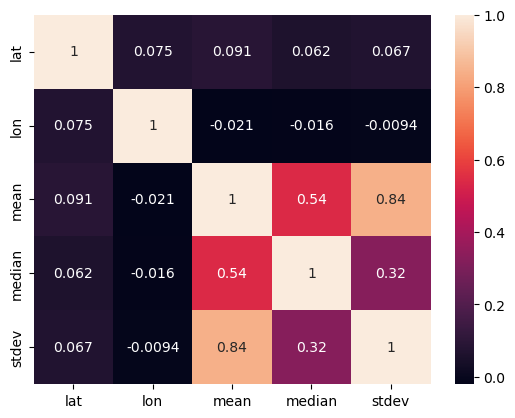

In [328]:
sns.heatmap(med_inc_us.corr(numeric_only=True),annot=True)

Looking at just California doesnt give more data on any relationships.

In [343]:
ca = med_inc_us.loc[med_inc_us['state_name'] == 'California']

<Axes: >

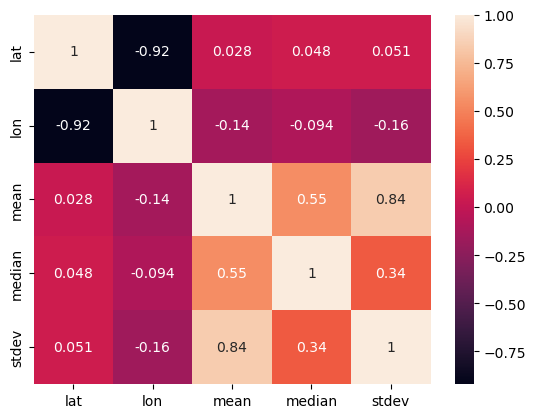

In [344]:
sns.heatmap(ca.corr(numeric_only=True),annot=True)

Slicing the data to get all the mean of each median and mean for all states, then melting the plots in order to see mean or median and the ammount by state.

In [345]:
mean_agg = med_inc_us.groupby(['state_name','state_ab'])[['mean','median']].mean().reset_index()

In [346]:
mean_melt = mean_agg.melt(id_vars = ['state_name', 'state_ab'], var_name = 'type')
mean_melt.head()

state_name state_ab  type         value
0     Alabama       AL  mean  53612.925856
1      Alaska       AK  mean  77670.209524
2     Arizona       AZ  mean  62578.071313
3    Arkansas       AR  mean  52060.361765
4  California       CA  mean  78126.737805

The mean values are more skewed to the right, with most counts being between the ~58,000 to ~68,000 dollar range. The median is more symmetrical with a slight skew more to the right. This is important as it tells majority of the nations mean is on the lower part of the axis. 

Text(0.5, 1.0, 'Dist of Mean and Median in US')

<Figure size 1500x800 with 0 Axes>

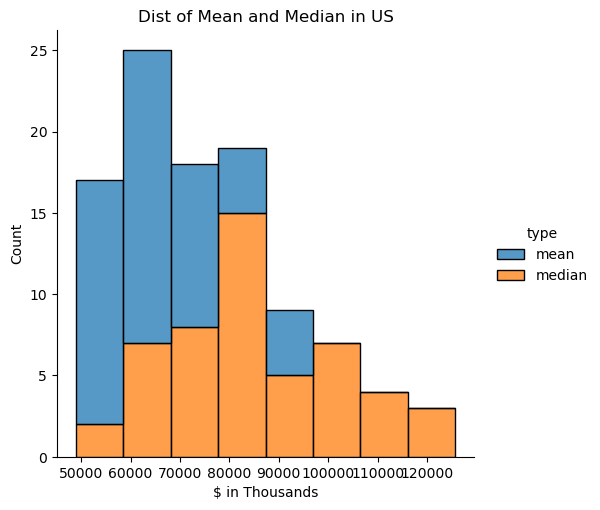

In [333]:
plt.figure(figsize=(15, 8))
sns.displot(mean_melt, x="value", hue = 'type', multiple="stack")
plt.xlabel('$ in Thousands')
plt.title('Dist of Mean and Median in US')

Splitting the US into two seperate pieces by an longitude that seems to be around the center of the US, **not** split by east and west coast. 

Looking at the means of the the west and east data, it is shown the east has a  very slightly smaller average making the different almost negligible.
The east having 65,293 versus the west 65,726.

In [321]:
med_inc_west  = med_inc_us.loc[med_inc_us['lon'] <= -100]
west_agg = med_inc_west.groupby(['state_name','state_ab'])[['mean','median']].mean().reset_index()

In [322]:
med_inc_east  = med_inc_us.loc[med_inc_us['lon'] >= -100]
east_agg = med_inc_east.groupby(['state_name','state_ab'])[['mean','median']].mean().reset_index()

In [323]:
#West has larger Mean
west_agg['mean'].mean(), east_agg['mean'].mean(), med_inc_us['mean'].mean()

(65726.751290767, 65293.99253179477, 67170.30831207616)

Comparing the distributions of east and west coast means, the east coast seems to have a larger range of means, going up to one hundres thousand. With majority of means sitting between 50-60,000 dollars. 
The west has a smaller range between ~45-85,000, with majority of the people having between ~55-63,000 dollars, which is more than the east. So while the means are similar between the two sides, the distribution between them are not equivalent, with west having more lon points withing range of mean income while east coast has more people on higher income.

<Axes: xlabel='mean'>

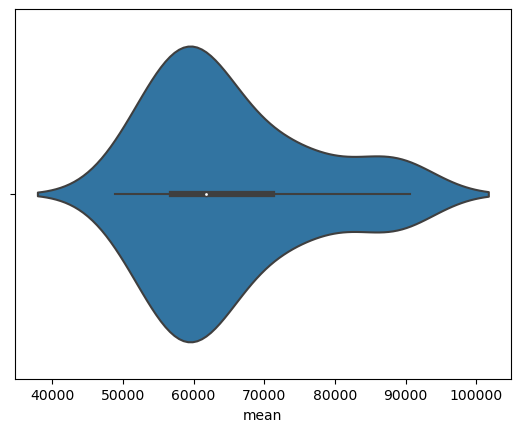

In [351]:
sns.violinplot(east_agg, x="mean")

<Axes: xlabel='mean'>

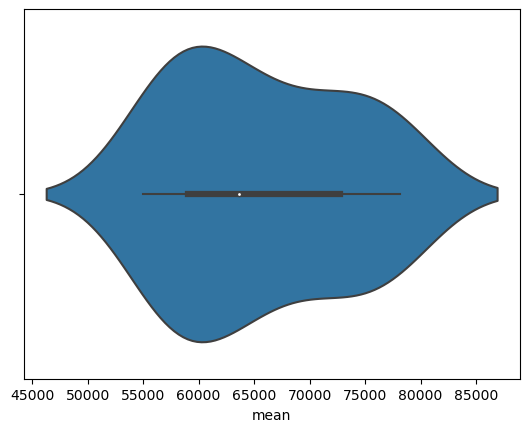

In [352]:
sns.violinplot(west_agg, x="mean")

Grouping the data by type shows that borough's have the highest median income while around 100,000 dollars, villages have the highest outlier of median incomes 200,000 dollars. 

The track value has a higher mean than both city and town, however track makes up most of the data so I believe that if the data were labeled differently that city and town would have a higher mean

*Note:* Although country and municpality are not types of municpality the data set did have some points labeled as them.

In [353]:
mean_all = med_inc_us.groupby(['state_name','state_ab','type'])[['mean','median']].mean().reset_index()
mean_all.head()

state_name state_ab   type          mean         median
0    Alabama       AL    CDP  49803.500000  101309.750000
1    Alabama       AL   City  52363.096774   47323.322581
2    Alabama       AL   Town  54488.720000   45109.000000
3    Alabama       AL  Track  53715.361472   64096.205628
4     Alaska       AK    CDP  71128.437500   93138.125000

Text(0.5, 1.0, 'Type Means')

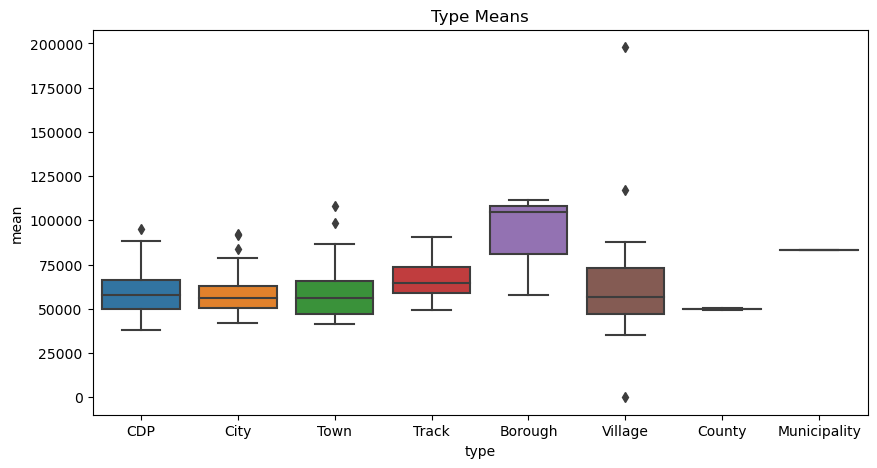

In [411]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(mean_all, x = 'type', y = 'mean')
plt.title('Type Means')

###  Cleaned_Adult table

We see that more people make less than 50 thousand a year, roughly 76% of the people within this data set make less than 50 thousand. The US mean is around 67 thousand, it can be inferred that high frequency of people make less than the mean amount. 

In [565]:
cleaned_adult.groupby('income')['age'].count()

income
<=50K    31472
>50K      9610
Name: age, dtype: int64

Looking at all adults by their income, we see that majority of people who make less than 50 thousand a year are below the age of 40 years old, with the median being around 35 years old for males who make under 50 thousand and 33 for females.
The median age for males who make over 50 thousand is roughly 45 and 40 for females. The interquartile range for male and females who make under 50 thousand is less than those who make over 50 thousand. 

Text(0.5, 1.0, 'Income v Age')

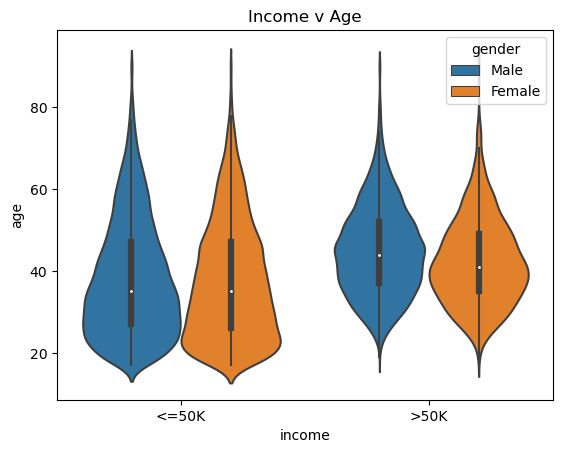

In [566]:
sns.violinplot(cleaned_adult, x = 'income', y = 'age', hue = 'gender')
plt.title('Income v Age')

**The rest of these graphs will look at only ages 40 to capture the milennial age range(with some leeway)**

The graph also shows that the range and mean age for American Indian/Eskimo is larger than the other races with females making over 50 thousand as well has having the second lowest median value for females, showing there is more dispersion amoung Amer-Eskimo/Indian women greater than other's. White females also have the highest median age for females who make under 50 thousand.
There is also an outlier with some white female under 20 making over 50 thousand.

Asian/Pacific-Islander males have the largest iqr as well as the lowest median age for males who make over 50 thousand, showing that spread of Asian men making over 50 thousand is larger. Their are also a couple of outliers with white and black males.   


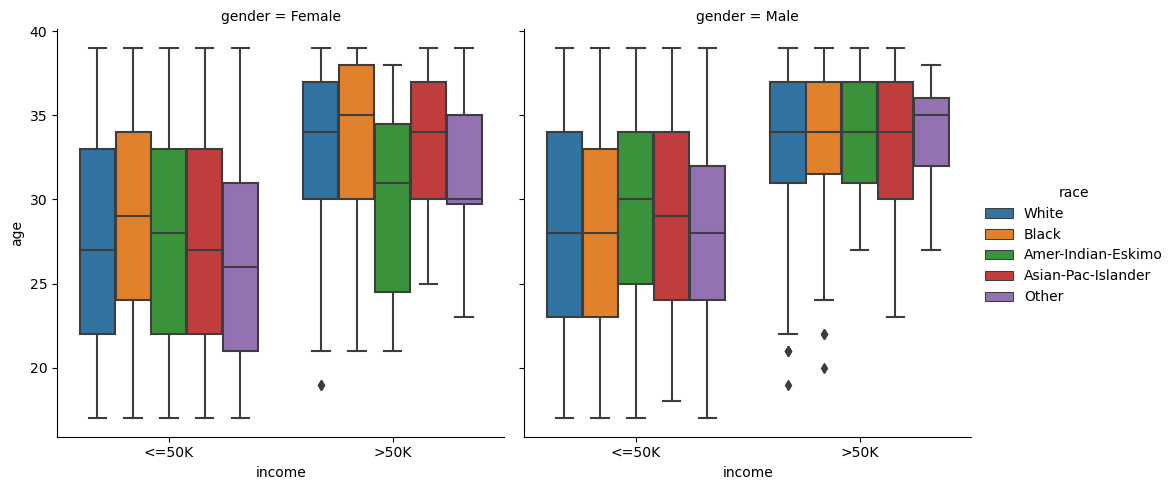

In [567]:
sns.catplot(cleaned_adult.loc[cleaned_adult['age'] <= 39], x = 'income',
            y = 'age', hue = 'race', 
            col = 'gender', kind = 'box')

Some intresting data from the graph shows that people who married an Air Force spouse tend to have higher frequency of people of around 8 years of education as well as more people making over 50 thousand. A common trend with these plots show that the range for over 50 thousand is usually smaller, as well as no matter the marital status their seems to be lots of frequency around 8-10 years of education. 
Something intresting I noticed is that females whose spouse is abesnt has a higher median of education than men, this when observed across all plots show that females tend to have a higher median of education compared to males.

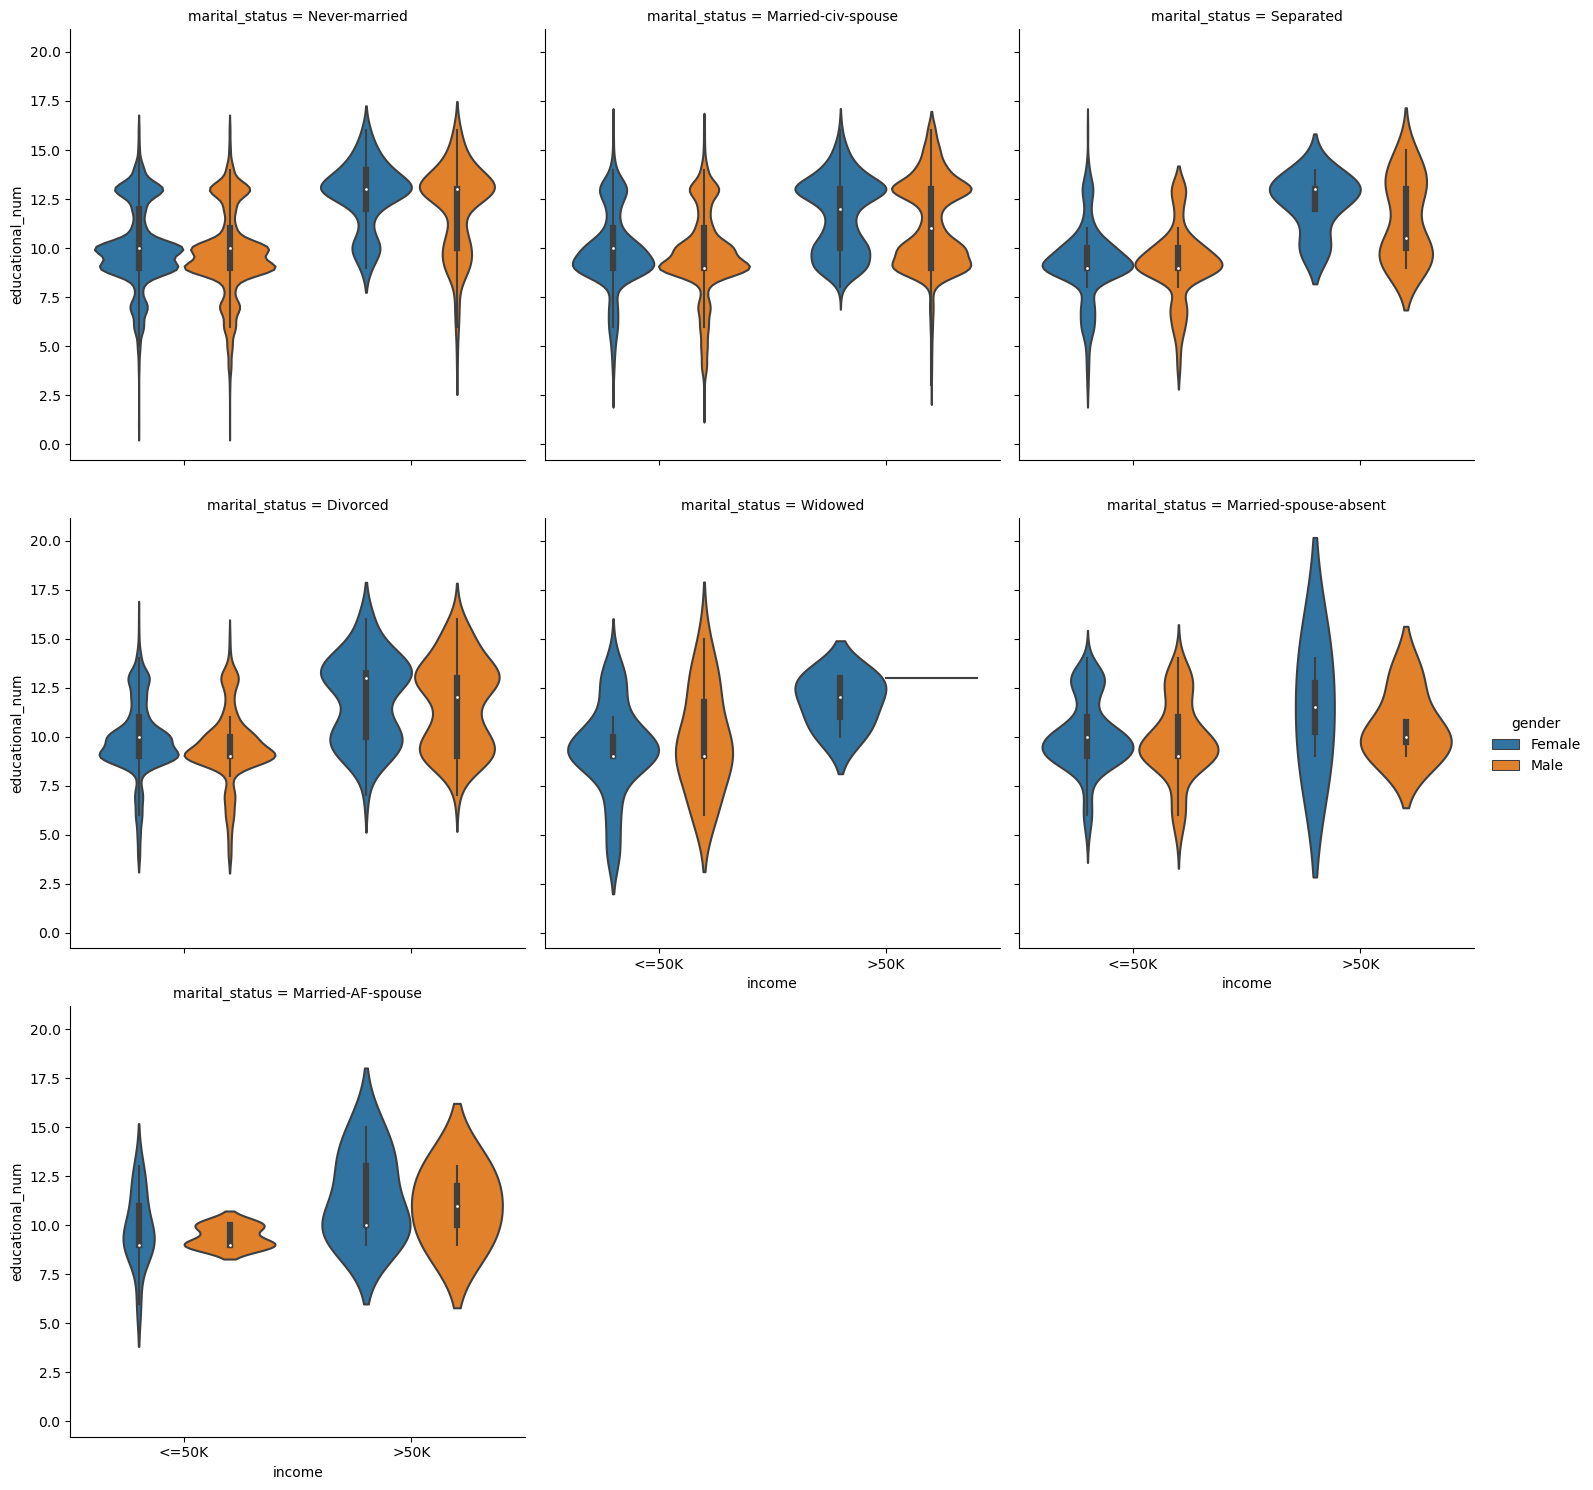

In [449]:
sns.catplot(cleaned_adult.loc[cleaned_adult['age'] <= 39], x = 'income', 
            y = 'educational_num', hue = 'gender', 
            col = 'marital_status', kind = 'violin',  col_wrap= 3)

A common trend with these plots shows that there is more distribution of people with a more education who make over 50 thousand as well as a smaller range of people with very few people with less than 7.5 years of education. People who make less than 50 thousand tend to have a a higher frequency of people with less total years. 
It can also be seen that no matter the job people who make over 50 thousand, almost always the majority of frequency of people is alway above 10 years of education, not very many have less than 10 years.  

In the never worked plot it shows only people who make less than 50 thousand, this could possibly be attributed to people still getting education at the time of the data being taken. 

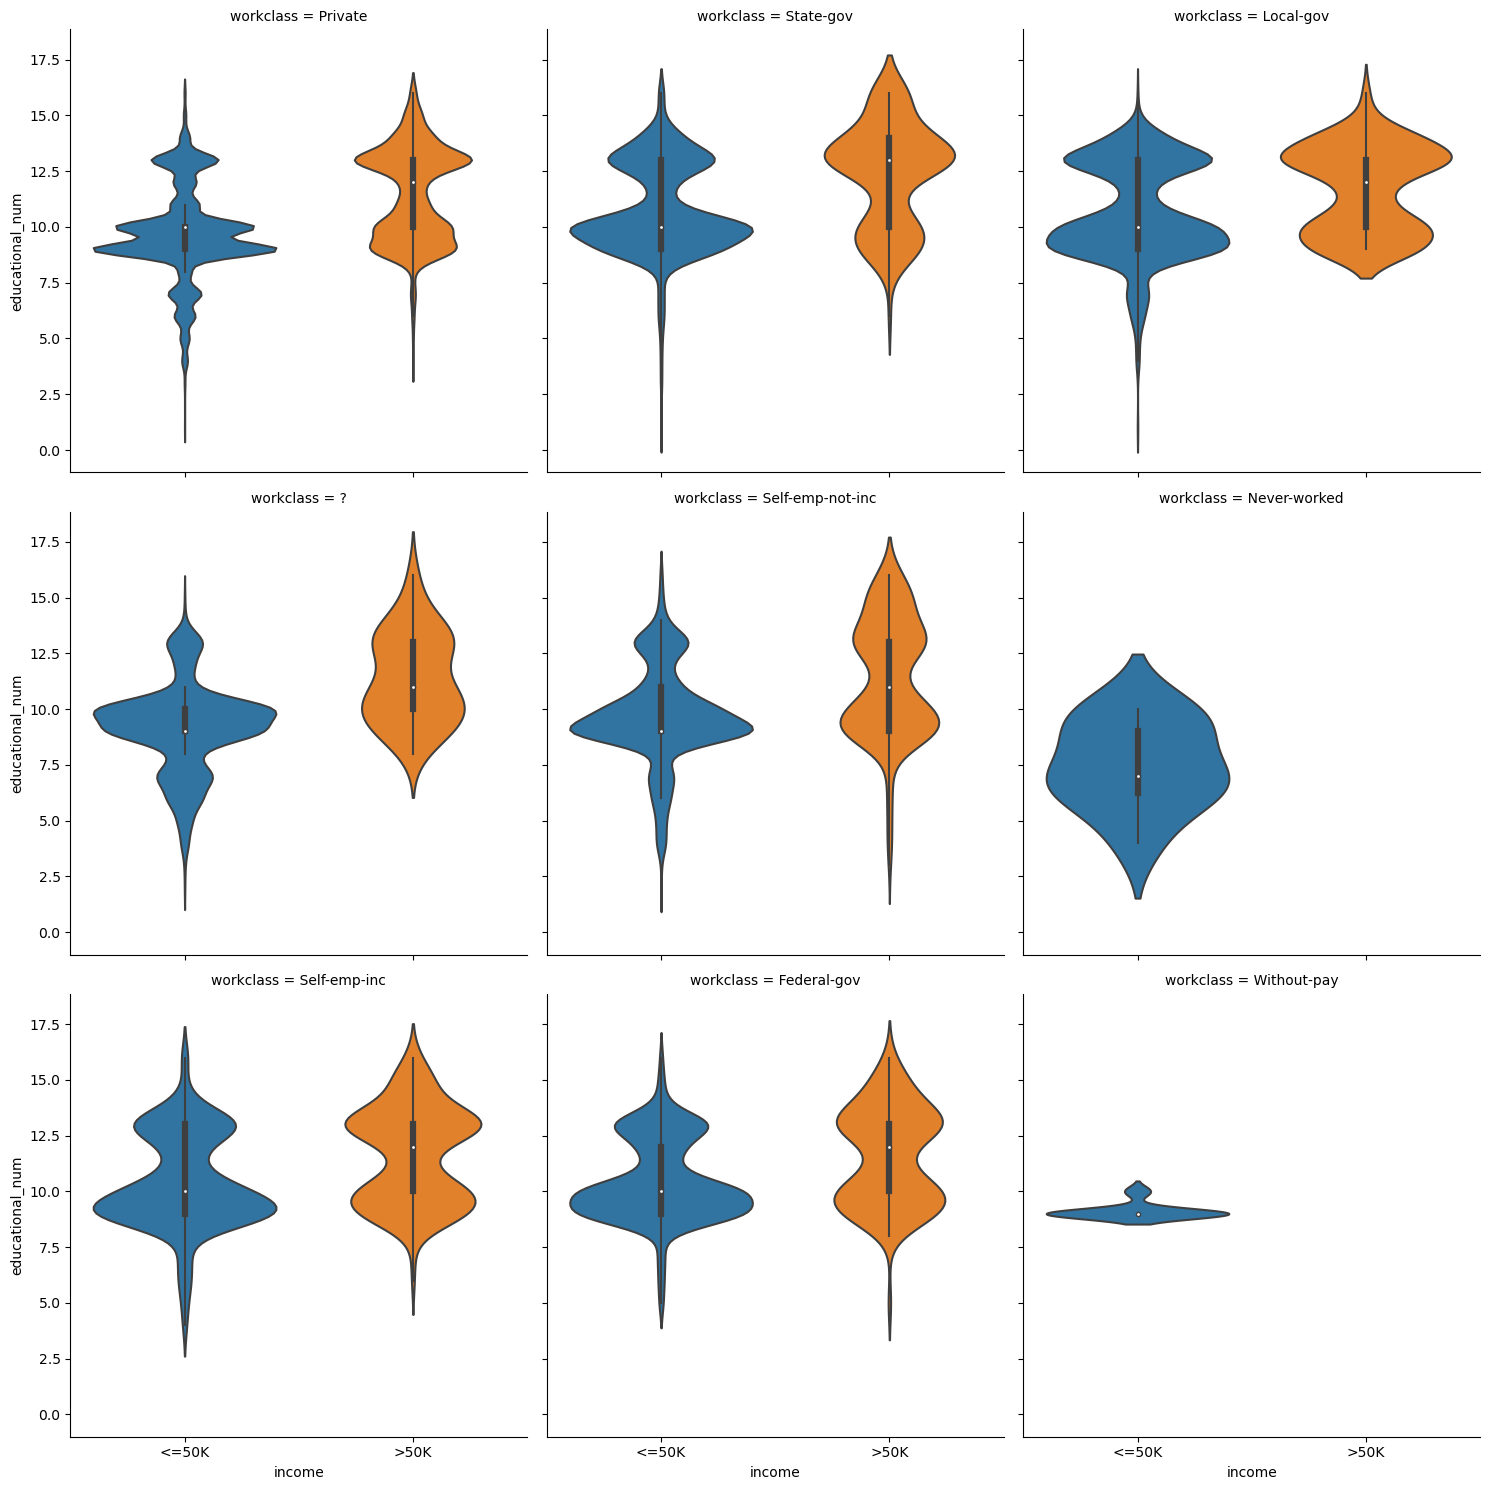

In [442]:
sns.catplot(cleaned_adult.loc[cleaned_adult['age'] <= 39], x="income",
            y="educational_num", col = 'workclass',
             kind="violin", col_wrap=3)

**There are a lot of plots just skim**
*this stems from the issue of income being non-numeric*

Taking a quick look at the plot, when looking at the native countries it is shown that immigrants have a lower range of people under 40 who make over 50 thousand, the country with the largest range is the United States. Since there are a lot of countries its are to compare distributions but overall the dirstibuton of people under 40 who do make over 50 thousand is around mid to late 30's.

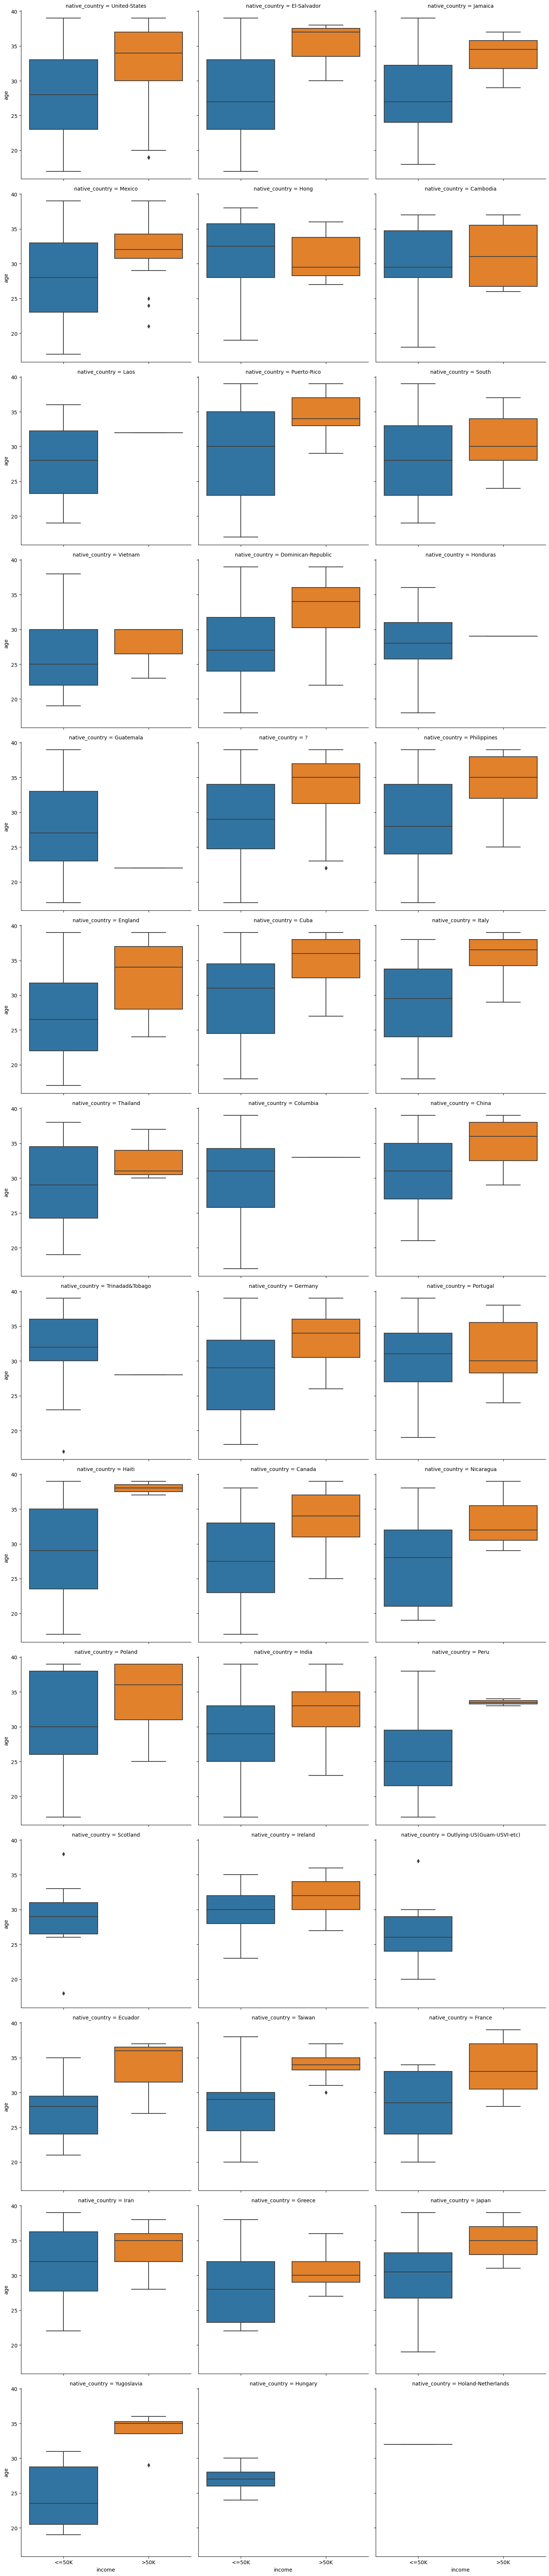

In [575]:
sns.catplot(cleaned_adult.loc[cleaned_adult['age'] <= 39], x="income",
            y="age", col = 'native_country',
             kind="box", col_wrap=3)

### Loans

Merging the student loan and grouped loans to see if there could be any correlation between the debt types and people under 40 with loans.

In [527]:
merdged_loans = student_loan_added.merge(grouped_mort, on = 'year')

In [528]:
#realized that grouped_mort wouldve been a better choice for possible merge
merdged_loans.head()

year  under_30  under_40  over_40  heloc  auto_loan  credit_card  \
0  2004     146.0     260.0     87.1   1589       2942         2815   
1  2005     161.0     290.0    102.8   2136       3121         2895   
2  2006     194.0     348.0    130.8   2379       3226         2983   
3  2007     217.0     388.0    153.3   2502       3234         3216   
4  2008     248.0     450.0    183.3   2739       3218         3411   

   student_loan  other  
0          1199   1703  
1          1508   1617  
2          1803   1689  
3          2097   1647  
4          2415   1640

In [529]:
merdged_loanned = merdged_loans.drop(columns = ['under_30', 'over_40'])

In [535]:
melt_merdge = merdged_loanned.melt(id_vars = 'year')

Merging the plots and perfomring a pair plot doesnt show anything much insightful. The scales of the values between under 40 and the debt amounts are different, while both are in billions there are still not to the same scale, as the loan types go up to over a trillion dollars, opposed to the student loan amount stays under 500 billion because that debt is plit by age group.

Text(0.5, 1.0, 'Relationship between types of debt')

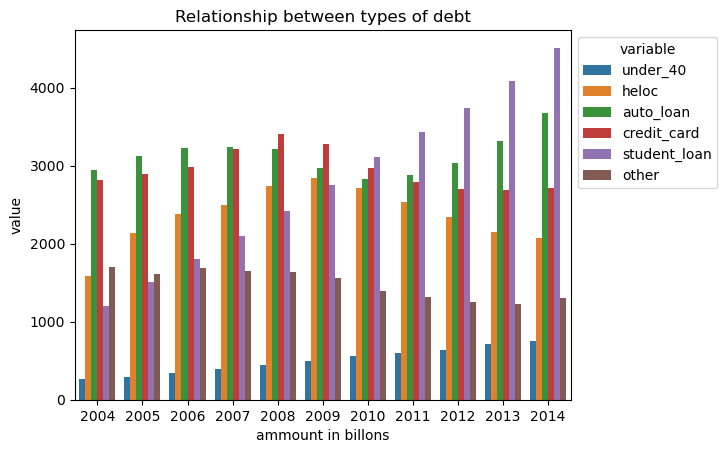

In [542]:
ax = sns.barplot(melt_merdge, x= 'year', y = 'value', hue = 'variable')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel('Year')
plt.xlabel('ammount in billons')
plt.title('Relationship between types of debt')

The amount of student debt had been rapidly increasing over the 10 years between 2004-14. For people under 40 it increased by over 400 billion dollars and over 40 grew over 200 billion dollars.   

Text(0.5, 1.0, 'Amt of Student Debt')

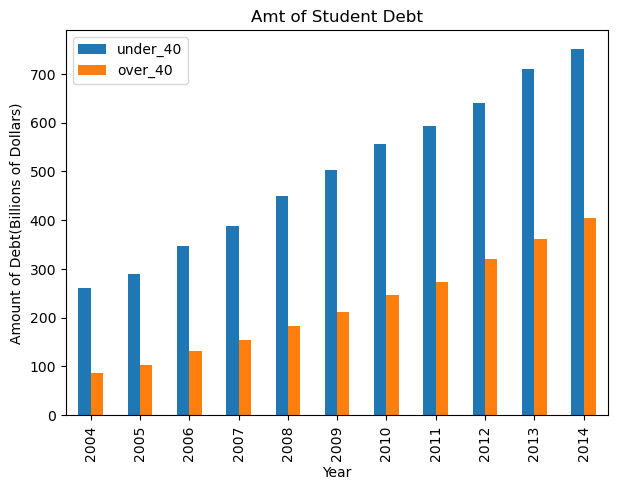

In [487]:
student_line = student_loan_added.plot(x="year", y=["under_40", "over_40"], kind="bar", figsize=(7, 5))
plt.xlabel("Year")
plt.ylabel("Amount of Debt(Billions of Dollars)")
plt.title('Amt of Student Debt')

The percentage of people owning homes no matter loan status is going down, for both groups both go down around 10%, which is a lot when they were starting at ~30% of people owning houses. 

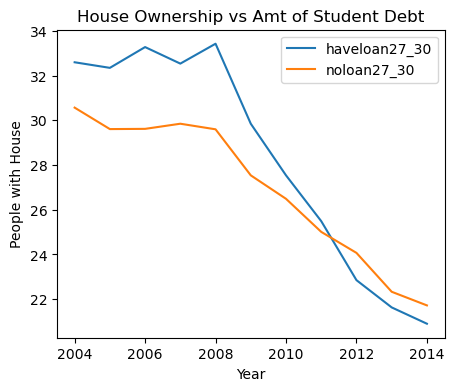

In [501]:
hoaft_line = hoaft_2003.plot(x="year", y=["haveloan27_30", "noloan27_30"], kind="line", figsize=(5, 4))
plt.xlabel("Year")
plt.ylabel("People with House")
plt.title('House Ownership vs Amt of Student Debt')
plt.show()

The lineplot below shows that student loan have been linearly increasing through the years, also Home Equity Credit loans started decreasing after 2008. This can be attributed to homeowner ship rates going down so there is less need for one to get a HELOC. The amound of debt gathered over the years is increasing in billions while the mean income is staying at 67,000. 

In [494]:
grouped_melt = grouped_mort.melt(id_vars = 'year', var_name = 'debt')
grouped_melt.head()

year   debt  value
0  2004  heloc   1589
1  2005  heloc   2136
2  2006  heloc   2379
3  2007  heloc   2502
4  2008  heloc   2739

<Axes: xlabel='year', ylabel='value'>

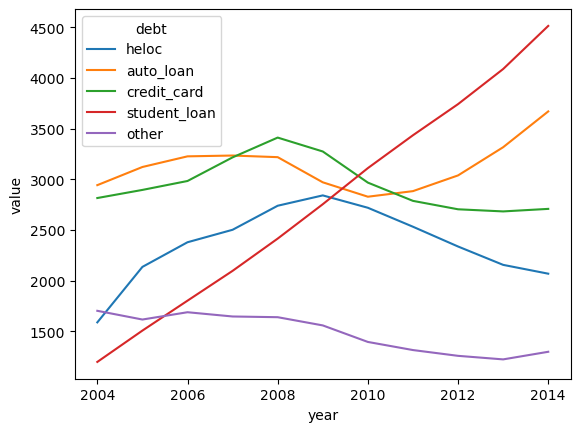

In [497]:
sns.lineplot(grouped_melt, x = 'year', y = 'value', hue = 'debt')

Checking a heatmap of the grouped loans data we see a strong positive linear association between heloc and credit card debt. There is also a slight positive correlation between auto loan and student loans, and it shows a strong negative correlation between student loan and other debts.

In [489]:
mort_ny = grouped_mort.drop(columns = 'year')

<Axes: >

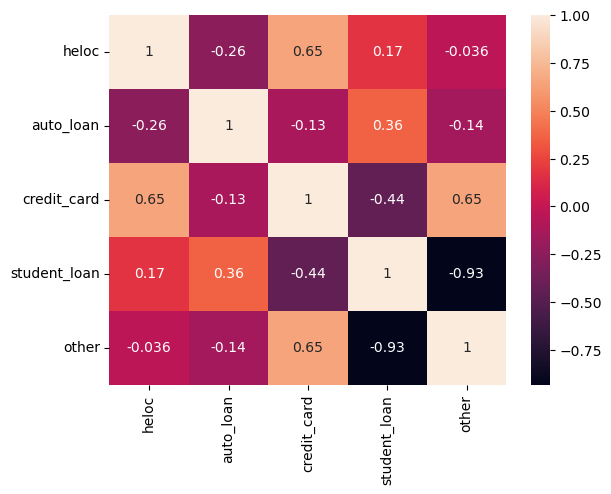

In [490]:
sns.heatmap(mort_ny.corr(numeric_only=True),annot=True)

Early data showed that most people make below 50 thousand, its also seen that overall home ownership is going down with debt going up. ALthough the correlation doesnt fully make sense that the correlation would be going up as the amount of Home Equity debt is going down.  

<Axes: xlabel='heloc', ylabel='credit_card'>

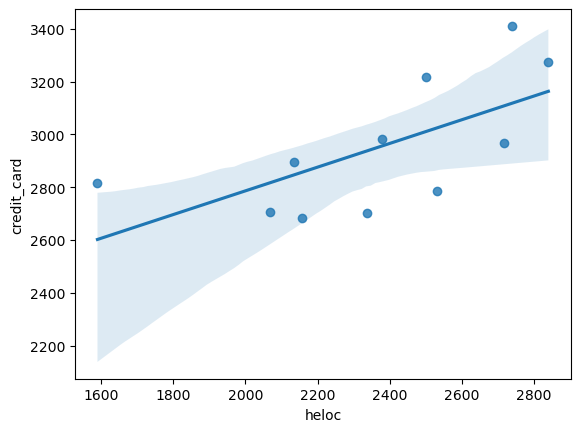

In [492]:
#significance of HELOC and Credit(how are they similar)
sns.regplot(grouped_mort, x = 'heloc', y = 'credit_card')

In [495]:
#HELOC going down because people arent buying homes

## Summary/Conclusion

Millenials are having a harder time creating wealth, they have more debt as well as lower percentage of them willing to purchase houses. I looked at data containing the geographic location of States with all county, type and income data, as well as data containing features of a person and their standing of greater or less that 50 thousand a year and total debt data. With these data sets, first I polished them in order to create easier tables to work with. This was done by ensuring all the data within the tables were all necessary variables and the proper values. I looked first looked at geographical data comapred to income, the data set showing there is not much of a correlation. Afterwards I made multiple plots showcasing age vs income, gender and martial status vs income, etc to find any reasonable correlation that could affect income. Finally I took a look ath debt within the United States and looked at its growth between the years of 2004-2014. 

Not all of the questions could be answered with the data provided by the tables, for instance I could not find a distinct difference in terms of east and west of the US, however I did find that boroughs (self governing town) tend to have a higher median income compared to the other municpals. It tells us that people who live within these borough are more succesful in job endevours or that the the jobs available are generally better for that community. I also found that despite marital status the median age of females who make over 50 thousand is greater then males who make 50 thousand. Ive also seen that no matter the work class the frequency of people with over 12 years of education is higher in those of who make over 50 thousand than those under, regardless of gender. There are two implications here, the first being males generally males who do earn over 50 thousand a year are younger(in terms of median) and people who have more education have a higher probability of making ocer 50 thouasand. Finally the the clearest findings I saw were that the over student loan debt had increased by over 400 **BILLION** dollars between 2004 and 2014, and alongside that homeownership rates have been dropping for 30 year olds with and without student loans. Due to these drastic changes we also see a lower amound of Home Equity Loans as well as stagnating credit card debt because milennials cant afford to take risks such as house loans, and credit cards are almost required now-a-days. 


I faced quite a few limitations when working with this data/project, the most notable being I couldnt find census data from generations before milennials, as well as finding data for debt for early generations that is usuable. Other limitations I had were with the data sets I were using such as the median income United States, had lots of missing or wrong data that changed a lot of the how the analysis went. Some ways I could have imporved this project could have been to find or pay for the full data, finding different census data about loans so they could be properly merdged to find more data and find data that actually shows the income ammount rather than less or greater than, as well as having data more representative of modern day milennials.
These changes would greatly improve the analysis and findings.


Thank you for looking over my first Data Science solo project!!